In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from nilmtk.api import API

In [3]:
from nilmtk.disaggregate import Mean

In [4]:
from nilmtk_contrib.disaggregate import DAE,Seq2Point, Seq2Seq, RNN, WindowGRU

Using TensorFlow backend.
C:\Users\Hp\Anaconda3\envs\nilmtk_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\Anaconda3\envs\nilmtk_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\Anaconda3\envs\nilmtk_env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\Anaconda3\envs\nilmtk_env\lib

In [7]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,

  'appliances': ['fridge'],
  'methods': {
    
      'WindowGRU':WindowGRU({'n_epochs':50,'batch_size':32}),
      'RNN':RNN({'n_epochs':50,'batch_size':32}),
      'DAE':DAE({'n_epochs':50,'batch_size':32}),
      'Seq2Point':Seq2Point({'n_epochs':50,'batch_size':32}),
      'Seq2Seq':Seq2Seq({'n_epochs':50,'batch_size':32}),

      'Mean': Mean({}),
          
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': 'C:/Users/Hp/Desktop/nilmtk-contrib/dataport.hdf5',
				'buildings': {
				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-05'
				},
#                 56: {
#             'start_time': '2015-01-28',
#             'end_time': '2015-01-30'
#           },
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': 'C:/Users/Hp/Desktop/nilmtk-contrib/dataport.hdf5',
			'buildings': {
				10: {
					'start_time': '2015-04-05',
					'end_time': '2015-04-06'
				},
			}
	}
},
        'metrics':['mae']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Generating predictions for : WindowGRU
Generating predictions for : RNN
Generating predictions for : DAE
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
Generating predictions for : Mean


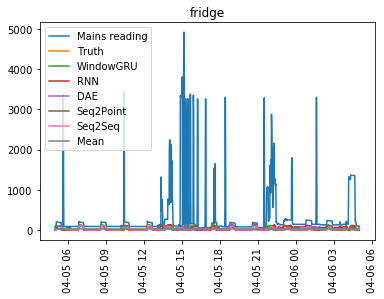

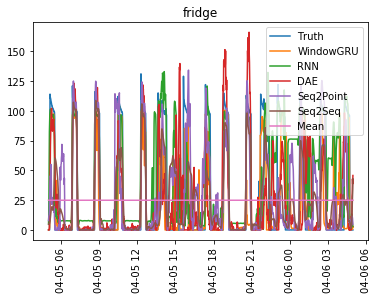

............  mae  ..............
        WindowGRU        RNN       DAE  Seq2Point    Seq2Seq       Mean
fridge  15.099038  22.637848  22.95949   21.10302  21.917109  39.607208


In [8]:
api_res = API(redd)

In [11]:
api_res.errors

[        WindowGRU        RNN       DAE  Seq2Point    Seq2Seq       Mean
 fridge  15.099038  22.637848  22.95949   21.10302  21.917109  39.607208]

In [12]:
api_res.errors_keys

['Datport_10_mae']